# Mega Case Study - Making a hybrid Deep Learning Model

## Part 1 - SOM

# Install MiniSom Package

In [49]:
!pip install MiniSom

## Importing the libraries


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [51]:
dataset = pd.read_csv(r"C:\Users\KUNAL\Documents\Deep_Learning\Unsupervised_learning\Self_Organizing_Maps\Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [52]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training the SOM


In [53]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results


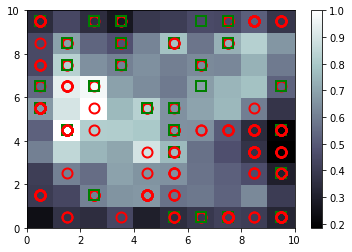

In [54]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [55]:
mappings = som.win_map(X)#returns the wining nodes dictionary
frauds = np.concatenate((mappings[(1,4)], mappings[(2,6)]), axis = 0)#concatenate the 2 nodes to get frauds
frauds = sc.inverse_transform(frauds)
# vimp we are here taking whote and less white because-

In [ ]:
## Printing the Fraud Clients

In [57]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))
frauds.shape

Fraud Customer IDs
15686461
15684512
15680643
15692137
15668830
15796569
15805212
15712877
15691150
15573520
15740458
15686885
15585928
15680895
15807546
15773869
15796111
15809800
15623072
15676909
15802071
15790630
15750055
15647898
15679801
15748499
15803682
15770406
15592773
15732943
15781975
15770255
15773789
15794868
15705506
15812470
15674583
15788215
15722535
15585855
15661412
15799785
15591360
15649183
15589881
15602456
15580579
15568819


(48, 15)

# Part 2 - Going from Unsupervised to Supervised Deep Learning

Create Matrix of Features

In [59]:
# contains cust from 1 to last column i.e 690X15
customers = dataset.iloc[:, 1:].values 
customers
#FRAUD=1 YES FRAUD,FRAUD=0 NO FRRAUD
#Here we need to predict the prob of customer to be a fraud 

array([[1.000e+00, 2.208e+01, 1.146e+01, ..., 1.000e+02, 1.213e+03,
        0.000e+00],
       [0.000e+00, 2.267e+01, 7.000e+00, ..., 1.600e+02, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.958e+01, 1.750e+00, ..., 2.800e+02, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.883e+01, 9.540e+00, ..., 1.000e+02, 1.000e+00,
        1.000e+00],
       [0.000e+00, 2.742e+01, 1.450e+01, ..., 1.200e+02, 1.200e+01,
        1.000e+00],
       [1.000e+00, 4.100e+01, 4.000e-02, ..., 5.600e+02, 1.000e+00,
        1.000e+00]])

In [60]:
customers.shape

(690, 15)

## Create Dependent Variable

In [ ]:
#V.IMP- In the credit card dataset we have taken Y-class that tell's us who got approval & who got not but it is not the 
#dependant variable
#So here we build a dependant variable by:
1.)creating A VECTOR OF 690 ZEROS BY NP.ZEROS.2.)ASSIGNING VALUES 1 FOR CUSTOMERS WHO WERE FRAUDS BY ABOVE LIST so we do it in a loop 

In [62]:
#To create a supervised deep learning model we need to deppendant variable
#FRAUD=1 YES FRAUD,FRAUD=0 NO FRAUD-binary outcome
is_fraud=np.zeros(len(dataset))
for i in range(len(dataset)):#range(0:690)
    if dataset.iloc[i,0] in frauds:   # i for each customer line in dataset,0 for the 1st column to check in list of frauds
        is_fraud[i]=1 # replace all is_fraud by 1 who were in the list of frauds
is_fraud       

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Part 3 - ANN

### Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)# customers include the original dataset not including the customer id's

## Building the ANN

## Import Tensorflow

In [64]:
import tensorflow as tf
tf.__version__

'2.2.0'

## Initializing the ANN

In [65]:
ann=tf.keras.models.Sequential()

## Adding the input layer and the first hidden layer

In [66]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [67]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Training the ANN

## Compiling the ANN

In [68]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [71]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)#batch_size takes 1 row at a time due to small dataset & less epochs as nn will learn fastly

Epoch 1/10
690/690 [==============================] - 1s 2ms/step - loss: 0.1427 - accuracy: 0.9464
Epoch 2/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1316 - accuracy: 0.9478
Epoch 3/10
690/690 [==============================] - 2s 2ms/step - loss: 0.1218 - accuracy: 0.9536
Epoch 4/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1133 - accuracy: 0.9580
Epoch 5/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1067 - accuracy: 0.9609
Epoch 6/10
690/690 [==============================] - 2s 3ms/step - loss: 0.1017 - accuracy: 0.9652
Epoch 7/10
690/690 [==============================] - 2s 3ms/step - loss: 0.0979 - accuracy: 0.9681
Epoch 8/10
690/690 [==============================] - 2s 2ms/step - loss: 0.0935 - accuracy: 0.9667
Epoch 9/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9710
Epoch 10/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0873 - accuracy: 0.9710

## Predicting test set results

In [73]:
# here we will concatenate the dataset customers id's & the y_pred that contains prob of cust being fraud & not fraud
y_pred=ann.predict(customers)
#dataset.iloc[:,0] is a 1 d array and y_pred is a 2d array so to concatenate we need to convert it by 0:1.values convert it into range of 2-d & by .values into array
y_pred=np.concatenate((dataset.iloc[:,0:1].values,y_pred),axis=1)
# to sort only predicted probabilities & not the customers id
y_pred = y_pred[y_pred[:, 1].argsort()]# y_pred goes into data then select the second column of y_pred & apply method i.e argsort
y_pred
# 3.25e-07 0.000000000325

array([[1.56058720e+07, 3.25635682e-07],
       [1.57112990e+07, 4.75614314e-07],
       [1.55777710e+07, 5.98985366e-07],
       ...,
       [1.56864610e+07, 9.34217930e-01],
       [1.56921370e+07, 9.71225023e-01],
       [1.57882150e+07, 9.74427104e-01]])